Statistics Mini Project

1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

a)Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

b)Is there any evidence that the players overall rating is greater than 80?

c)Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

d)Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

e)Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

Note: 
1) Perform all the Statistical analysis with 5% (Significance level). 

2) Assume all the features are normally distributed and have equal variance.




In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,chi2_contingency,f_oneway
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm
from scipy.stats import ttest_1samp,f_oneway

In [2]:
fifa = pd.read_csv('fifa_stats.csv')

In [3]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [4]:
fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [6]:
num= fifa.select_dtypes(include=np.number)
cat= fifa.select_dtypes(exclude=np.number)

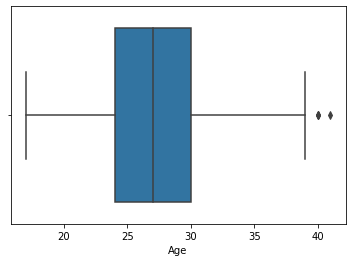

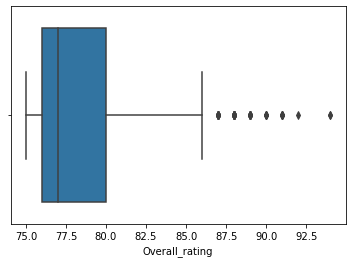

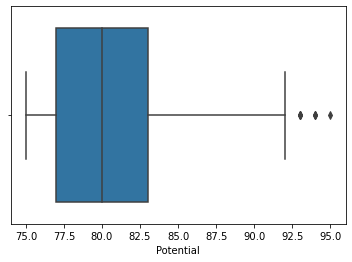

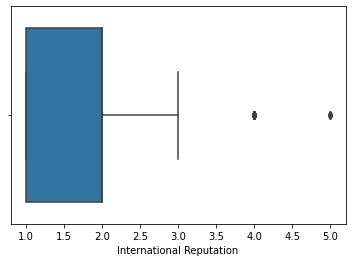

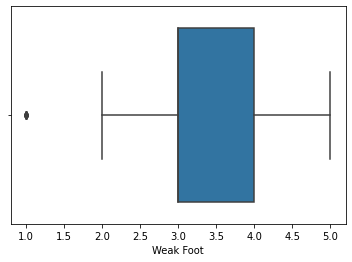

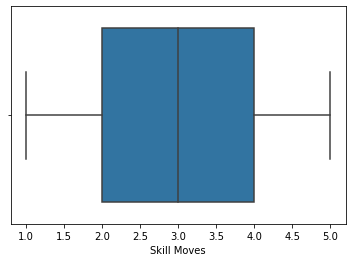

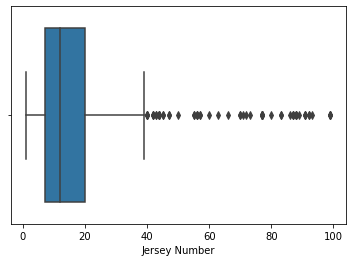

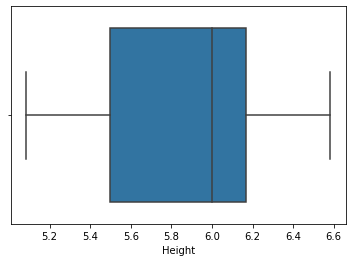

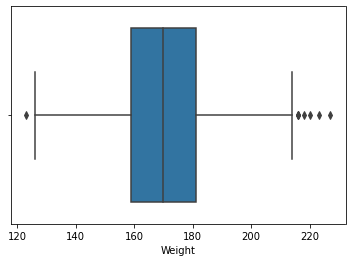

In [7]:
for i in num.columns:
    sns.boxplot(fifa[i])
    plt.show()

In [8]:
# a)Assuming age as population, perform the central limit theorem with sample size of 200. 
# Find the standard error and the mean of sampling distribution. 
# Compare the results with population mean and standard deviation. 
#  Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

27.375 0.3022912502868713


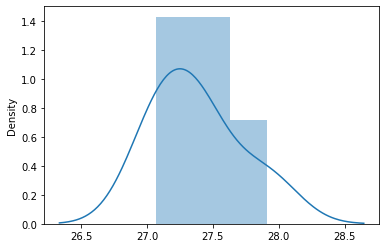

In [9]:
mu=np.mean(fifa['Age'])
sigma=np.std(fifa['Age'],ddof=1)
# xbar= np.mean(sample)
list_of_sample_mean=[]
for i in range(5):
    sample=np.random.choice(fifa['Age'],size=200,replace=True)
    sample_mean= np.mean(sample)
    list_of_sample_mean.append(sample_mean)
s=list_of_sample_mean
print(np.mean(s),np.std(s))
sns.distplot(s)
plt.show()

In [10]:
# b)Is there any evidence that the players overall rating is greater than 80?

In [11]:
# HA : overall rating > 80
# HO : <=80
s=fifa[fifa['Overall_rating'] > 80]['Overall_rating']
ttest_1samp(s,80)
# since p val< 0.05  we can reject null hypothesis and there are players > 80 

Ttest_1sampResult(statistic=27.81557161639246, pvalue=1.6004134797591052e-96)

In [12]:
# c)Perform the statistical test to identify whether preferred foot has any impact on potential. 
# Also, perform the graphical analysis.

In [13]:
fifa['Preferred Foot']= fifa['Preferred Foot'].replace({'Left':0,'Right':1}) 

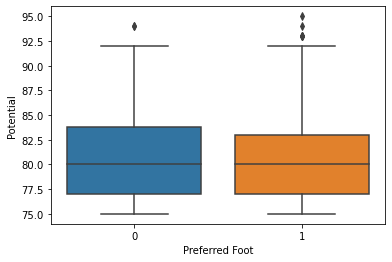

In [14]:
# HO: avg potential of left footed player = avg potential of right footed player
# HA: avg potential of left footed player != avg potential of right footed player
g1= fifa[fifa['Preferred Foot']==0]['Potential']
g2= fifa[fifa['Preferred Foot']==1]['Potential']
ttest_ind(g1,g2)
# since p val > 0.05 we cannot reject null hypothesis hence say that avg potential of left footed player = avg potential of right footed player
# and say that it does not have any impact on potential
# fifa.groupby('Preferred Foot')['Potential'].mean().plot(kind='bar')
# plt.title('Preferred foot vs Potential')
# plt.show()
sns.boxplot(x=fifa['Preferred Foot'],y=fifa['Potential'])
plt.show()

In [15]:
# d)Perform the statistical test to identify the relation between the overall rating and potential.
# [Assume both are continuous data points].

In [16]:
fifa['Potential'].corr(fifa['Overall_rating'])

0.7326945574179996

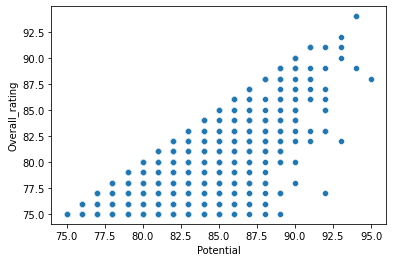

In [17]:
# HO: Avg of potential = avg of Overall_rating
# HA: Avg of potential != avg of Overall_rating
ttest_ind(fifa['Potential'],fifa['Overall_rating'])
# since p value is less than 0.05 we can reject null hypothesis and say there is  relation between them
sns.scatterplot(x=fifa['Potential'],y=fifa['Overall_rating'])
plt.show()
# from scatter plot we can say that increase in potential increases overall rating


In [18]:
# e)Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.

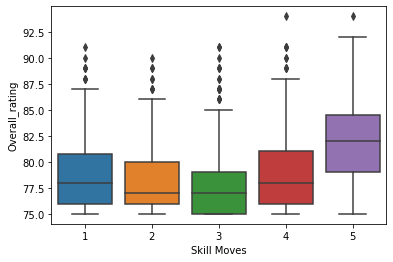

In [19]:
# HO Avg overall rating of 1 star = Avg overall rating of 2 star = 3 star = 4 star=5 star
# HA Avg overall rating of 1 star != Avg overall rating of 2 star != 3 star != 4 star 1=5 star
# x=fifa['Skill Moves']
# m=ols('Overall_rating ~ x',data=fifa).fit()
# print(anova_lm(m,type=1))
g1= fifa[fifa['Skill Moves']==1]['Overall_rating']
g2= fifa[fifa['Skill Moves']==2]['Overall_rating']
g3= fifa[fifa['Skill Moves']==3]['Overall_rating']
g4= fifa[fifa['Skill Moves']==4]['Overall_rating']
g5= fifa[fifa['Skill Moves']==5]['Overall_rating']
f_oneway(g1,g2,g3,g4,g5)
# since p value < 0.05 we can reject null hypothesis and say that HA holds good
sns.boxplot(x=fifa['Skill Moves'],y=fifa['Overall_rating'])
plt.show()
# 5 star skillers have more rating as comapred to others 

2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 

a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

d)Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

e)Perform statistical tests to identify the relation between network and network_type. 

Note: 
1) Perform all the Statistical analysis with 5% (Significance level). 

2) Perform the test of normality and test of variance in the appropriate places.

In [20]:
ph=pd.read_csv('phone.csv')

In [72]:
ph.info()
stats.shapiro(ph['duration'])
# since pval > 0.70 we cannot reject null hypothesis and say data is normal 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

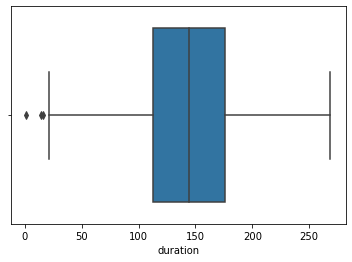

In [73]:
sns.boxplot(ph['duration'])
plt.show()

In [25]:
# a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. 
# Which of the Intervals are wider? Interpret the results.
len(ph)

820

In [27]:
# 95% interval 
np.mean(ph['duration'])- 1.96 * (np.std(ph['duration'],ddof=1) / np.sqrt(len(ph)) ),np.mean(ph['duration'])+ 1.96 * (np.std(ph['duration'],ddof=1) / np.sqrt(len(ph)) )

(141.17778226665462, 147.4320888530163)

In [74]:
# 99% interval 
np.mean(ph['duration'])- 2.58 * (np.std(ph['duration'],ddof=1) / np.sqrt(len(ph)) ),np.mean(ph['duration'])+ 2.58 * (np.std(ph['duration'],ddof=1) / np.sqrt(len(ph)) )

(140.18858071473008, 148.42129040494083)

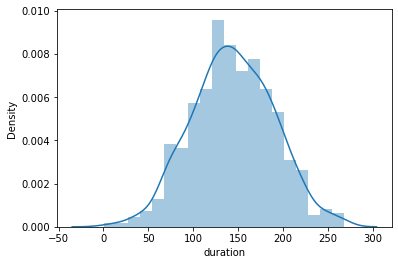

In [75]:
sns.distplot(ph['duration'])
plt.show()

In [31]:
# 95% interval  is wider

In [45]:
# b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.
# avg duration for all 'data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail','landline' is equal
# avg duration for all 'data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail','landline' not is equal
ph['network'].value_counts()
g1=ph[ph['network']=='data']['duration']
g2=ph[ph['network']=='Vodafone']['duration']
g3=ph[ph['network']=='Meteor']['duration']
g4=ph[ph['network']=='Tesco']['duration']
g5=ph[ph['network']=='Three']['duration']
g6=ph[ph['network']=='voicemail']['duration']

In [43]:
ph['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [44]:
f_oneway(g1,g2,g3,g4,g5,g6)

F_onewayResult(statistic=1.6562151601233113, pvalue=0.14283480850066219)

In [46]:
#since p val > 0.05 we cannot reject null hypothesis,hence  avg duration for all 'data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail','landline' is equal

In [47]:
# c) Plot the distribution of duration with respect to each network in the same graph 
# and interpret the results from the graph.

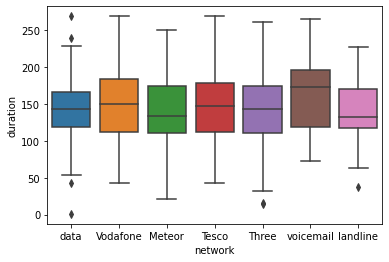

In [48]:
sns.boxplot(x=ph['network'],y=ph['duration'])
plt.show()

In [76]:
# Except landline and voice mail the distribution of duration is more or less same

In [50]:
# d)Perform statistical tests to identify the relation between item and duration. 
# Detailed explanation of relation between the classes is required.

In [57]:
# HO: Avg duration for data=avg duration for call=avg duration of sms
# HA:Avg duration for data!=avg duration for call!=avg duration of sms
g1=ph[ph['item']=='data']['duration']
g2=ph[ph['item']=='call']['duration']
g3=ph[ph['item']=='sms']['duration']
f_oneway(g1,g2,g3)
# since pval > 0.05 we cannot reject null hypothesis and say Avg duration for data=avg duration for call=avg duration of sms

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

In [51]:
# e)Perform statistical tests to identify the relation between network and network_type.

In [58]:
#HO : network type = network 
#H1 : network type != network 
ph['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [59]:
ph['network_type'].unique()

array(['data', 'mobile', 'voicemail', 'landline'], dtype=object)

In [61]:
d=pd.crosstab(ph['network_type'],ph['network'])
d

network,Meteor,Tesco,Three,Vodafone,data,landline,voicemail
network_type,,,,,,,
data,0,0,0,0,150,0,0
landline,0,0,0,0,0,42,0
mobile,87,84,215,215,0,0,0
voicemail,0,0,0,0,0,0,27


In [62]:
chi2_contingency(d)

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,  15.36585366,  39.32926829,  39.32926829,
          27.43902439,   7.68292683,   4.93902439],
        [  4.45609756,   4.30243902,  11.01219512,  11.01219512,
           7.68292683,   2.15121951,   1.38292683],
        [ 63.76463415,  61.56585366, 157.57926829, 157.57926829,
         109.93902439,  30.78292683,  19.78902439],
        [  2.86463415,   2.76585366,   7.07926829,   7.07926829,
           4.93902439,   1.38292683,   0.88902439]]))

In [63]:
# since p value < 0.05 we reject null hypothesis and say network_type does not depend on network

In [66]:
ph.columns

Index(['date', 'duration', 'item', 'month', 'network', 'network_type'], dtype='object')

In [70]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB
